In [401]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [402]:
# Set Pandas display options to show all columns and rows while printing
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [403]:
# import data
df_planar = pd.read_csv('../data/IEEE_2024_planar_field_positioning_evaluation_with_size_data.csv')
df_spindle = pd.read_csv('../data/IEEE_2024_spindle_field_positioning_evaluation_with_size_data.csv')

df = pd.concat([df_planar, df_spindle])

In [404]:
# delta between predicted and reference
df['Dx'] = df['Xestimated[m]'] - df['Xgt[m]']
df['Dy'] = df['Yestimated[m]'] - df['Ygt[m]']
df['Dz'] = df['Zestimated[m]'] - df['Zgt[m]']

In [405]:
df.head(5)

,image,setup,Trunk-Cam_dist[mm],ObjType,Position,ObjSizeX,ObjSizeY,ObjSizeZ,Xgt[m],Ygt[m],Zgt[m],Xestimated[m],Yestimated[m],Zestimated[m],Manhattan[m],Euclidean[m],Dx,Dy,Dz
0,color_3_1_0.png,2D,1835.0,Apple,3,0.065,0.065,0.065,0.168,0.040,0.938,0.168,-0.010,0.998,0.11,0.078102,0.00,-0.050,0.06
1,color_3_1_0.png,2D,1835.0,Apple,2,0.065,0.065,0.065,-0.368,0.000,1.368,-0.468,-0.057,1.448,0.24,0.141421,-0.10,-0.057,0.08
2,color_3_1_0.png,2D,1835.0,Apple,1,0.065,0.065,0.065,0.198,0.030,2.258,0.168,-0.020,2.318,0.14,0.083666,-0.03,-0.050,0.06
3,color_3_2_0.png,2D,1813.0,Apple,3,0.065,0.065,0.065,-0.568,0.020,0.868,-0.468,0.040,0.928,0.18,0.118322,0.10,0.020,0.06
4,color_3_2_0.png,2D,1813.0,Apple,2,0.065,0.065,0.065,0.158,0.257,1.448,0.168,0.318,1.608,0.23,0.171172,0.01,0.061,0.16


In [406]:
# chunks
# 2D
df_2D = df.loc[df['setup'] == '2D'].copy()

# 3d
df_3D = df.loc[df['setup'] == '3D'].copy()

## positioning error related to dimensionality (2D, 3D)

In [407]:
# Define the list of dataframes
dataframes = {
    '2D': df_2D,
    '3D': df_3D
}

results = []

# Iterate through the dataframes and calculate RMSE values
for name, df_chunk in dataframes.items():
    
    rmse_manhattan = np.sqrt(np.sum(df_chunk['Manhattan[m]'] ** 2) / df_chunk['Manhattan[m]'].count())
    rmse_euclidean = np.sqrt(np.sum(df_chunk['Euclidean[m]'] ** 2) / df_chunk['Euclidean[m]'].count())

    results.append([name, rmse_manhattan, rmse_euclidean])

# Create a DataFrame from the results
rmse_df = pd.DataFrame(results, columns=['DataFrame', 'RMSE_Manhattan', 'RMSE_Euclidean'])

print(np.round(rmse_df, 3))


  DataFrame  RMSE_Manhattan  RMSE_Euclidean
0        2D           0.460            0.37
1        3D           0.607            0.38


## positioning error related to single axes

In [408]:
df.tail(5)

,image,setup,Trunk-Cam_dist[mm],ObjType,Position,ObjSizeX,ObjSizeY,ObjSizeZ,Xgt[m],Ygt[m],Zgt[m],Xestimated[m],Yestimated[m],Zestimated[m],Manhattan[m],Euclidean[m],Dx,Dy,Dz
10,color_4_4_0.png,3D,2610.0,Apple,2,0.065,0.065,0.065,-0.188,0.117,1.148,-0.267,0.338,1.318,0.47,0.289310,-0.079,0.221,0.170
11,color_4_4_0.png,3D,2610.0,Apple,1,0.065,0.065,0.065,0.030,0.057,1.888,-0.068,0.057,2.117,0.33,0.250799,-0.098,0.000,0.229
12,color_4_5_0.png,3D,2916.5,Apple,3,0.065,0.065,0.065,-0.030,0.267,0.768,-0.168,0.718,1.098,0.92,0.575326,-0.138,0.451,0.330
13,color_4_5_0.png,3D,2916.5,Apple,2,0.065,0.065,0.065,-0.168,-0.030,1.188,-0.267,0.348,1.488,0.78,0.494368,-0.099,0.378,0.300
14,color_4_5_0.png,3D,2916.5,Apple,1,0.065,0.065,0.065,-0.098,-0.088,2.168,-0.168,0.308,2.488,0.79,0.517011,-0.070,0.396,0.320


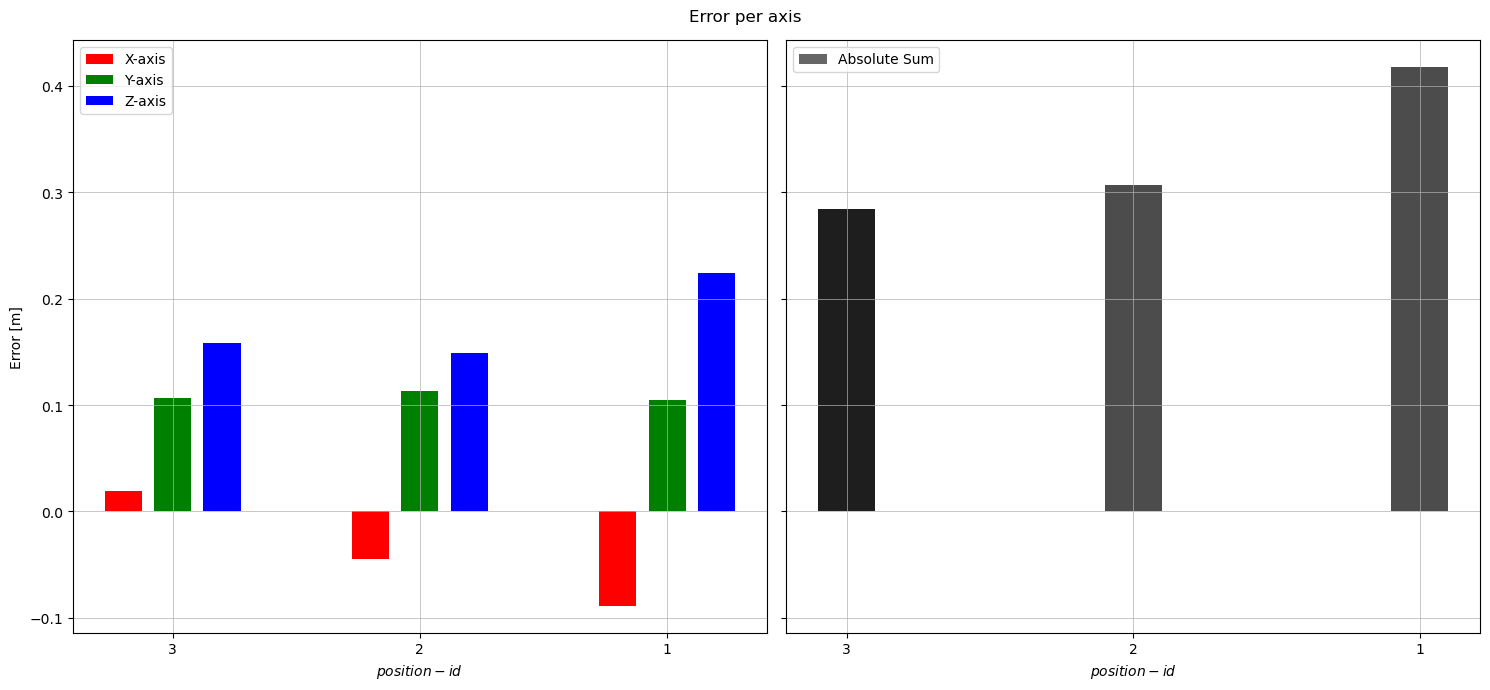

In [412]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7), sharey=True)
ax[0].grid(lw=.5)
ax[1].grid(lw=.5)


for pos in df['Position'].unique():

    df_pos = df.loc[df['Position'] == pos].copy()
    avg_error_x = np.sum(df_pos['Dx']) / len(df_pos)
    avg_error_y = np.sum(df_pos['Dy']) / len(df_pos)
    avg_error_z = np.sum(df_pos['Dz']) / len(df_pos)
    sum_error = np.abs(avg_error_x) + np.abs(avg_error_y) + np.abs(avg_error_z)

    ax[0].bar(pos - 1.2, avg_error_x, width=0.15, color='r')
    ax[0].bar(pos - 1, avg_error_y, width=0.15, color='g')
    ax[0].bar(pos - 0.8, avg_error_z, width=0.15, color='b')
    ax[1].bar(pos - 1, sum_error, width=0.2, color='k', alpha=.7)

ax[0].bar(pos - 1.2, avg_error_x, width=0.15, color='r', label='X-axis')
ax[0].bar(pos - 1, avg_error_y, width=0.15, color='g', label='Y-axis')
ax[0].bar(pos - 0.8, avg_error_z, width=0.15, color='b', label='Z-axis')
ax[1].bar(pos - 1, sum_error, width=0.2, color='k', alpha=.6, label='Absolute Sum')


ax[0].set_xlabel('$position-id$')
ax[1].set_xlabel('$position-id$')
ax[0].set_ylabel('Error [m]')
plt.suptitle('Error per axis')

# Set ticks to each group
ax[0].set_xticks(ticks=np.arange(len(df['Position'].unique())), labels=df['Position'].unique())
ax[1].set_xticks(ticks=np.arange(len(df['Position'].unique())), labels=df['Position'].unique())

ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')
plt.tight_layout()

plt.savefig('../docs/images/field_error_per_axis.png', dpi=400)

plt.show()


mean error per each axis (not focused on position)

In [410]:
x = []
y = []
z = []
avg = []

# compute MBE (Mean Bias Error)
for pos in df['Position'].unique():

    df_pos = df.loc[df['Position'] == pos].copy()
    x.append((np.sum(df_pos['Dx']) / len(df_pos)))
    y.append((np.sum(df_pos['Dy']) / len(df_pos)))
    z.append((np.sum(df_pos['Dz']) / len(df_pos)))

print(f'X: {np.mean(x) : .4f}')
print(f'Y: {np.mean(y) : .4f}')
print(f'Z: {np.mean(z) : .4f}')

X: -0.0380
Y:  0.1080
Z:  0.1774
